In [0]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# [25 pts] A Toy Example: Decision Boundary and Conditional Independence Assumption

### Gaussian Distributed Data fits better to Gaussian Naive Bayesian rather than Logistic Regression, unfortunately that is not the case most of the time.
Now, imagine we have two artificial dataset. Both are drawn from Gaussian distribution. One of the dataset is with standard deviation 1 and the other is 5. Each cluster is conditionally independent from each other.

make_blobs function samples data points from gaussian distribution.

In [0]:
from sklearn.datasets import make_blobs
data1, label1 = make_blobs(n_samples=500, centers=2, n_features=2, cluster_std=1, random_state=1)
data2, label2 = make_blobs(n_samples=500, centers=2, n_features=2, cluster_std=5, random_state=1)

Let's split the datasets into train and test.

In [0]:
# code comes here
x1_train, x1_test, y1_train, y1_test = train_test_split(data1, label1, test_size=0.2)
# code comes here
x2_train, x2_test, y2_train, y2_test = train_test_split(data2, label2, test_size=0.2)

Plot the first dataset with standard deviation 1.

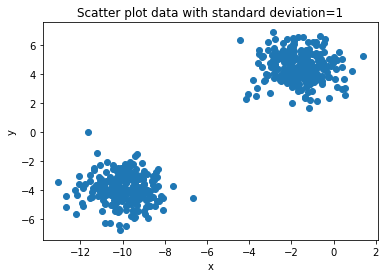

In [0]:
plt.scatter(data1[:,0], data1[:,1])
plt.title('Scatter plot data with standard deviation=1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Plot the first dataset with standard deviation 4.

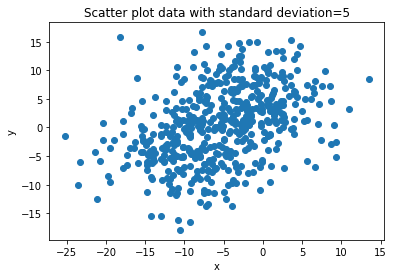

In [0]:
plt.scatter(data2[:,0], data2[:,1])
plt.title('Scatter plot data with standard deviation=5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Train a Gaussian Naive Bayesian and Logistic Regression with the 1st dataset.

In [0]:
# code comes here
GNB = GaussianNB()
# code comes here
GNB.fit(x1_train, y1_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
# code comes here
clf = LogisticRegression(random_state=0)
# code comes here
clf.fit(x1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Perfect Decision Boundary

In [0]:
# Predict
print("Classification Report for Naive Bayesian:")
print(classification_report(GNB.predict(x1_test), y1_test))

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        47

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [0]:
print("Confusion Matrix for Naive Bayesian, Dataset1:")
print(confusion_matrix(GNB.predict(x1_test), y1_test))

Confusion Matrix for Naive Bayesian, Dataset1:
[[53  0]
 [ 0 47]]


In [0]:
# Predict
print("Classification Report for Logistic Regression:")
print(classification_report(clf.predict(x1_test), y1_test))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        47

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [0]:
print("Confusion Matrix for Logistic Regression, Dataset1:")
print(confusion_matrix(clf.predict(x1_test), y1_test))

Confusion Matrix for Logistic Regression, Dataset1:
[[53  0]
 [ 0 47]]


### Both algorithm perfectly separate two data clusters for 1st dataset with standard deviation 1. The data points are linearly separable.

In [0]:
# code comes here
GNB2 = GaussianNB()
# code comes here
GNB2.fit(x2_train, y2_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
# code comes here
clf2 = LogisticRegression(random_state=0)
# code comes here
clf2.fit(x2_train, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predict
print("Classification Report for Naive Bayesian:")
print(classification_report(GNB2.predict(x2_test), y2_test))

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        47
           1       0.89      0.92      0.91        53

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [0]:
print("Confusion Matrix for Naive Bayesian, Dataset2:")
print(confusion_matrix(GNB2.predict(x2_test), y2_test))

Confusion Matrix for Naive Bayesian, Dataset2:
[[41  6]
 [ 4 49]]


In [0]:
# Predict
print("Classification Report for Logistic Regression:")
print(classification_report(clf2.predict(x2_test), y2_test))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        45
           1       0.93      0.93      0.93        55

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



In [0]:
print("Confusion Matrix for Logistic Regression, Dataset2:")
print(confusion_matrix(clf2.predict(x2_test), y2_test))

Confusion Matrix for Logistic Regression, Dataset2:
[[41  4]
 [ 4 51]]


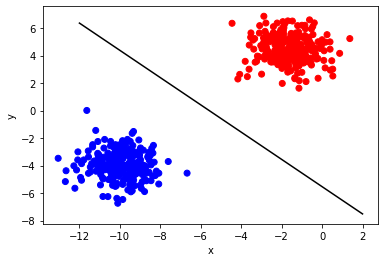

In [0]:
#Perfect decision boundary for the first dataset (Std. Dev = 1) by using scatter plot
colors=['red' if l==0 else 'blue' for l in label2]
plt.scatter(data1[:,0], data1[:,1], color=colors)
plt.xlabel('x')
plt.ylabel('y')

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-12, 2)
yy = a * xx - (clf.intercept_[0] / w[1])
plt.plot(xx, yy, 'k-')
plt.show()

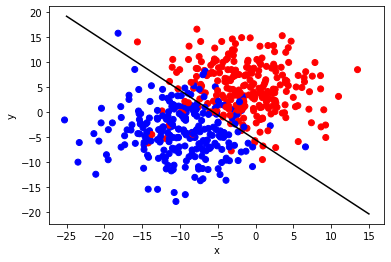

In [0]:
#Perfect decision boundary for the second dataset (Std. Dev = 5) by using scatter plot
colors=['red' if l==0 else 'blue' for l in label2]
plt.scatter(data2[:,0], data2[:,1], color=colors)
plt.xlabel('x')
plt.ylabel('y')

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-25, 15)
yy = a * xx - (clf.intercept_[0] / w[1])
plt.plot(xx, yy, 'k-')
plt.show()

**DISCUSSION**

I used the scatter plot above to draw the perfect decision boundries for Linear Regression with the first and the second datasets, respectively. As expected, we have obtained a linear seperator in the Linear Regression case. If I would draw for Gaussian Naive Bayesian, I would obtain a curve seperator. 
About the decision boundries, determining the perfect decision boundry for the first dataset is relatively easy compared to the second dataset since the datapoints are far away from each other, in other words there isn't deviation in the data itself. On the other hand, seperating the datapoints for the second dataset is harder since the standard deviation is 5 (relatively high compared to the first database) and the data much more deviate. The accuracies and the performance issues are discussed in the pdf document of this homework. 

### Use the scatter plot and draw the perfect decision boundary on two scatter plot. Discuss what is linear separability, decision boundary, which datapoints are harder to separate. Discuss the accuries and the why which model performs better.
 

### Please also read: [Equivalence of GNB and LR](https://appliedmachinelearning.blog/2019/09/30/equivalence-of-gaussian-naive-bayes-and-logistic-regression-an-explanation/)

# [75pts] Logistic Regression and Naive Bayesian Comparison

### The dataset
We will use Kaggle dataset. This dataset contains around 200k news headlines from the year 2012 to 2018 obtained from HuffPost.

You can [download.](https://www.kaggle.com/rmisra/news-category-dataset)

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df=pd.read_json("/content/drive/My Drive/News_Category_Dataset_v2.json", lines=True)

## Select 4 categories: Politics, Wellness, Entertainment, Travel

use only 50K of data row

In [0]:
df = df.sample(50000)

In [0]:
new_df = df[(df['category']== 'POLITICS') | (df['category']== 'WELLNESS') | (df['category']== 'ENTERTAINMENT') | (df['category']== 'TRAVEL')]

In [0]:
new_df['category'].value_counts()

POLITICS         8157
WELLNESS         4446
ENTERTAINMENT    4031
TRAVEL           2522
Name: category, dtype: int64

Convert category names to digit labelling

In [0]:
y = (new_df['category'].to_numpy() == "WELLNESS")*1 + (new_df['category'].to_numpy() == "ENTERTAINMENT")*2 + (new_df['category'].to_numpy() == "TRAVEL")*3

Merge headlines with short descriptions

In [0]:
X = new_df['short_description'] + ' '+ new_df['headline']

### Create Tf-Idf model

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

# code comes here
count_vectorizer = CountVectorizer(lowercase=True, stop_words='english')
# code comes here
x_train_counts = count_vectorizer.fit_transform(X)

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

# code comes here
tfidf_transformer = TfidfTransformer()
# code comes here
x_train_tf = tfidf_transformer.fit_transform(x_train_counts)

Split train and test data

In [0]:
from sklearn.model_selection import train_test_split
# code comes here
train_data, test_data, train_label, test_label = train_test_split(x_train_tf, y, test_size=0.2)

### Gaussian Naive Bayesian

In [0]:
# code comes here
GNB3 = GaussianNB()
# code comes here
GNB3.fit(train_data.toarray(), train_label)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
# Predict
print("Classification Report for Naive Bayesian:")
print(classification_report(GNB3.predict(test_data.toarray()), test_label))

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1567
           1       0.69      0.70      0.69       864
           2       0.71      0.64      0.67       865
           3       0.64      0.59      0.61       536

    accuracy                           0.71      3832
   macro avg       0.69      0.68      0.69      3832
weighted avg       0.71      0.71      0.71      3832



In [0]:
print("Confusion Matrix for Naive Bayesian:")
print(confusion_matrix(GNB3.predict(test_data.toarray()), test_label))

Confution Matrix for Naive Bayesian:
[[1255  142  103   67]
 [ 117  603   67   77]
 [ 222   54  551   38]
 [  82   79   58  317]]


### 6) Logistic Regression

In [0]:
# code comes here
clf3 = LogisticRegression(random_state=0)
# code comes here
clf3.fit(train_data.toarray(), train_label)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predict
print("Classification Report for Logistic Regression:")
print(classification_report(clf3.predict(test_data), test_label))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1772
           1       0.89      0.89      0.89       878
           2       0.86      0.87      0.86       768
           3       0.79      0.96      0.87       414

    accuracy                           0.90      3832
   macro avg       0.88      0.91      0.89      3832
weighted avg       0.91      0.90      0.90      3832



In [0]:
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(clf3.predict(test_data.toarray()), test_label))

Confusion Matrix for Logistic Regression:
[[1606   54   79   33]
 [  34  784   28   32]
 [  31   30  669   38]
 [   5   10    3  396]]


### Observe Logistic Regression is much slower but more accurate. Discuss.

**DISCUSSION**

We have evaluated the performance of Logistic Regression and Bayes classifiers (Gaussian Naive Bayes and Gaussian Bayes with general and shared covariance matrices) on the 4 topics which are "Politics, Wellness, Entertainment, Travel" of news dataset with 50000 samples. We have obtained the best results with the Logistic Regression, giving an accuracy of 90% on the test data whereas Gaussian Naive Bayesian gave an accuracy of 71% on the test data which is much lower than Logistic Regression classifier. As stated above, the time that it took to train the model and make the prediction for Linear Regression is considerably more (around 2 minutes for Linear Regression; around 30 seconds for Gaussian Naive Bayesian) than the Gaussian Naive Bayesian classifier. As a result, we can easily state that there is a trade off between the time and the performance. If we need high accuracy and no time limit (theoretically), we should use Logistic Regression approach but if we have time limitation, then we have to definitely use Gaussian Naive Bayesian approach by allowing the significant decrease in the accuracy.

*Note: I tried to explain the major concepts by not giving too much details since we have a limitation of lines (3-4 lines) for the discussion!*